**Chapter 4: Matrix Applications to Regression Models**

In [ ]:
#If using Colab, you can only pull files from your Google Drive
#Run the following code to give Colab access
from google.colab import drive
drive.mount('/content/drive')

#File paths should then look like this:
file_path = '/content/drive/MyDrive/LinAlg/data/file.png'
#As opposed to your computer's directory, which might look like this:
file_path = '/Users/yourname/LinAlg/data/file.png'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t, kendalltau
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import ks_2samp, norm
from statsmodels.tsa.stattools import acf
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Colorado temperature lapse rate & analysis (rerun)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     574.5
Date:                Sun, 11 May 2025   Prob (F-statistic):           2.94e-17
Time:                        05:59:06   Log-Likelihood:                -27.071
No. Observations:                  24   AIC:                             58.14
Df Residuals:                      22   BIC:                             60.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4763      0.546     61.309      0.0

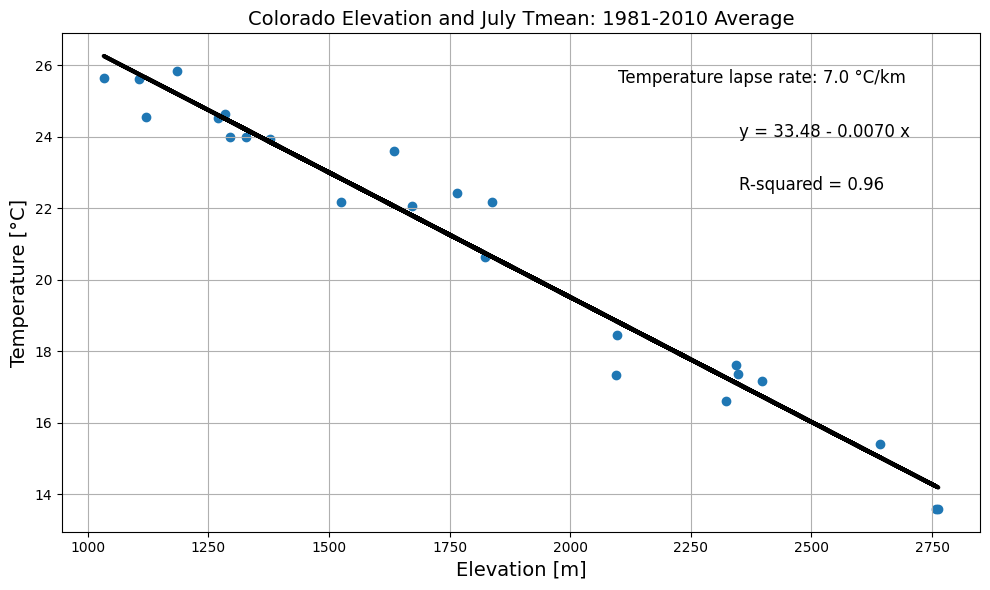

Rounded residuals: [ 0.25792  1.53427 -0.37129 -0.43697 -0.10542  0.43358 -0.60335  0.12833
 -0.64953 -0.19817  0.10302 -0.6388  -0.63366 -0.61692 -0.13283  0.63012
  0.51454  1.27623 -0.06333  0.27628 -1.52923  0.39122  1.52971 -1.09572]
Mean of residuals: -2.5905203907920318e-15
Sum of xa * residuals: 3.012701199622825e-11
Residual variance: 0.6096193452251237


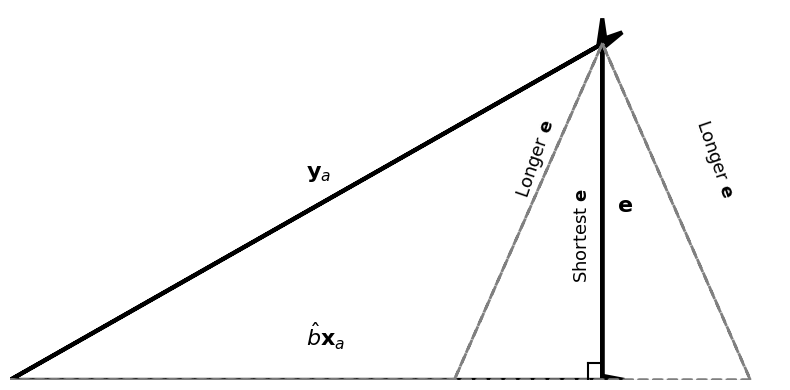

Slope (projection method): -0.0069818845648987665
Slope (correlation method): -0.006981884564898769
Variance of fitted values: 15.227212262175986
Variance of y: 15.810326418478262
R-squared: 0.9631181456430423
Correlation^2: 0.9631181456430413


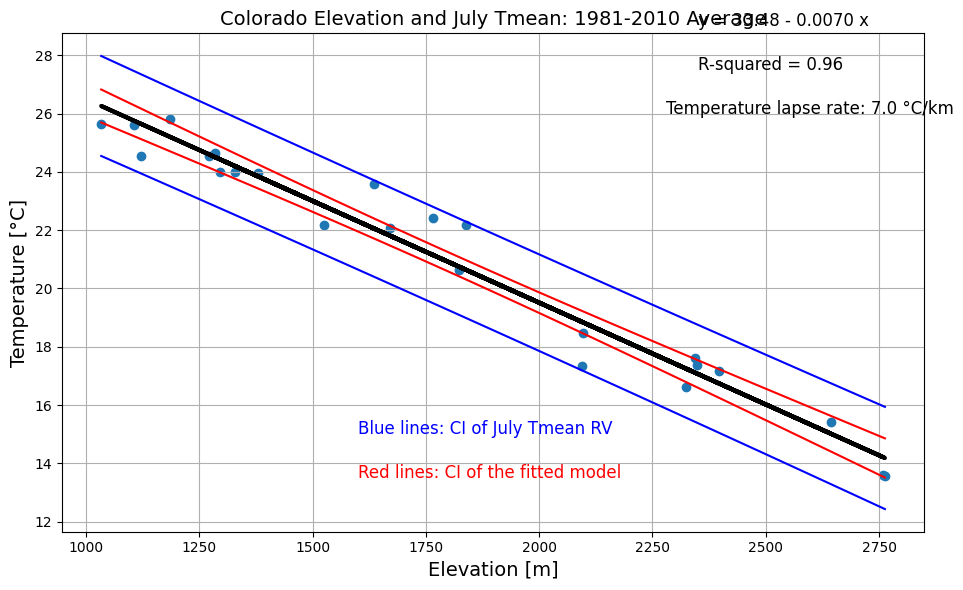

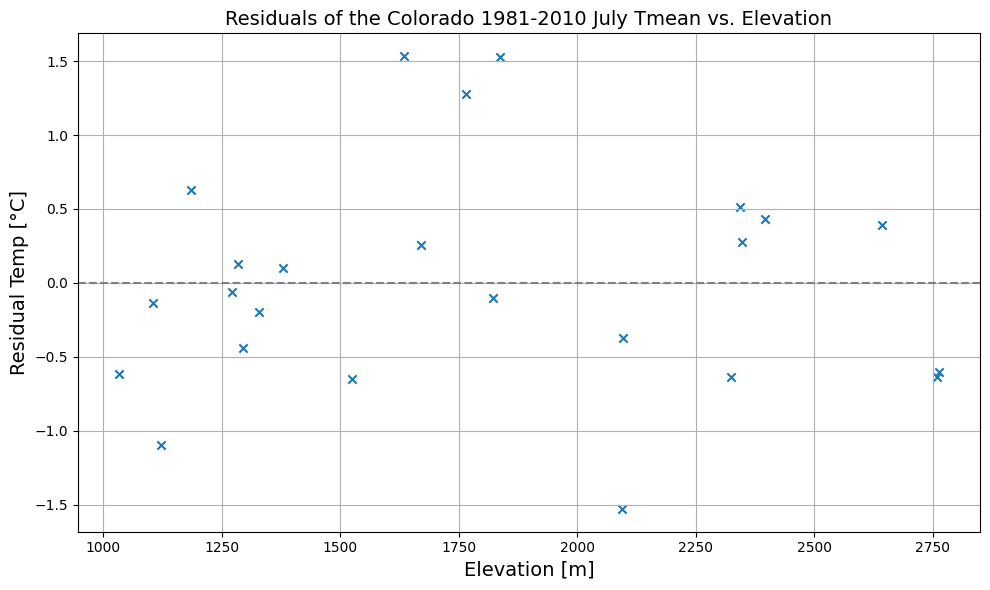

<Figure size 600x600 with 0 Axes>

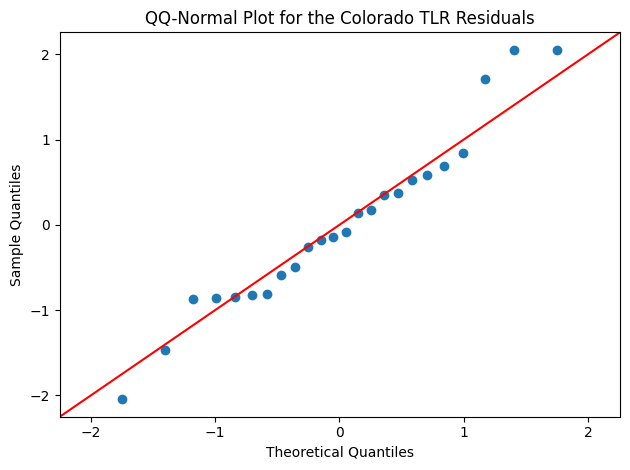

Durbin-Watson: 2.026779641075883
Mann-Kendall test on residuals: tau = 0.07246376811594202 , p = 0.6409517533780805
Mann-Kendall test on y: tau = -0.8768115942028986 , p = 2.0944279884835788e-13
                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     311.1
Date:                Sun, 11 May 2025   Prob (F-statistic):           6.05e-17
Time:                        05:59:07   Log-Likelihood:                -20.300
No. Observations:                  24   AIC:                             48.60
Df Residuals:                      20   BIC:                             53.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
               

In [ ]:
#Fig 4.1
x = np.array([
    1671.5, 1635.6, 2097.0, 1295.4, 1822.7, 2396.9, 2763.0, 1284.7,
    1525.2, 1328.6, 1378.9, 2323.8, 2757.8, 1033.3, 1105.5, 1185.7,
    2343.9, 1764.5, 1271.0, 2347.3, 2094.0, 2643.2, 1837.9, 1121.7])
y = np.array([
    22.064, 23.591, 18.464, 23.995, 20.645, 17.175, 13.582, 24.635,
    22.178, 24.002, 23.952, 16.613, 13.588, 25.645, 25.625, 25.828,
    17.626, 22.433, 24.539, 17.364, 17.327, 15.413, 22.174, 24.549])

#Linear regression
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, model.predict(X), color='black', linewidth=3)
plt.xlabel("Elevation [m]", fontsize=14)
plt.ylabel("Temperature [°C]", fontsize=14)
plt.title("Colorado Elevation and July Tmean: 1981-2010 Average", fontsize=14)
plt.text(2100, 25.5, "Temperature lapse rate: 7.0 °C/km", fontsize=12)
plt.text(2350, 24, "y = 33.48 - 0.0070 x", fontsize=12)
plt.text(2350, 22.5, "R-squared = 0.96", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#Colorado TLR regression analysis
residuals = model.resid
print("Rounded residuals:", np.round(residuals, 5))
print("Mean of residuals:", np.mean(residuals))

xa = x - np.mean(x)
print("Sum of xa * residuals:", np.sum(xa * residuals))
print("Residual variance:", np.sum(residuals**2) / (len(y) - 2))

#Fig 4.2
fig, ax = plt.subplots(figsize=(8, 4))

#Hide axes
ax.axis('off')
ax.set_xlim(0, 5.2)
ax.set_ylim(0, 2.2)

ax.arrow(0, 0, 4, 0, head_width=0.05, head_length=0.15, fc='black', ec='black', linewidth=3)
ax.arrow(4, 0, 0, 2, head_width=0.05, head_length=0.15, fc='black', ec='black', linewidth=3)
ax.arrow(0, 0, 4, 2, head_width=0.05, head_length=0.15, fc='black', ec='black', linewidth=3)

ax.arrow(0, 0, 5, 0, linestyle='dashed', linewidth=2, color='gray', length_includes_head=True)
ax.arrow(5, 0, -1, 2, linestyle='dashed', linewidth=2, color='gray', length_includes_head=True)
ax.arrow(3, 0, 1, 2, linestyle='dashed', linewidth=2, color='gray', length_includes_head=True)
ax.arrow(0, 0, 3, 0, linestyle='dashed', linewidth=2, color='gray', length_includes_head=True)

ax.plot([3.9, 3.9], [0, 0.1], color='black')
ax.plot([3.9, 4.0], [0.1, 0.1], color='black')

ax.text(2, 0.2, r'$\hat{b}\mathbf{x}_a$', fontsize=16)
ax.text(2, 1.2, r'$\mathbf{y}_a$', fontsize=16)
ax.text(4.1, 1.0, r'$\mathbf{e}$', fontsize=16)
ax.text(3.8, 0.6, "Shortest $\mathbf{e}$", fontsize=13, rotation=90)
ax.text(3.4, 1.1, "Longer $\mathbf{e}$", fontsize=13, rotation=71)
ax.text(4.6, 1.1, "Longer $\mathbf{e}$", fontsize=13, rotation=-71)

plt.tight_layout()
plt.show()

#Estimating regression slope b with 2 methods

#Using projection method
nxa = np.sqrt(np.sum(xa**2))
ya = y - np.mean(y)
b_proj = np.sum(ya * (xa / nxa)) / nxa
print("Slope (projection method):", b_proj)

#Using correlation
corxy = np.corrcoef(xa, ya)[0, 1]
nya = np.sqrt(np.sum(ya**2))
b_corr = corxy * nya / nxa
print("Slope (correlation method):", b_corr)

#R-squared verification
yhat = model.fittedvalues
print("Variance of fitted values:", np.var(yhat, ddof=1))
print("Variance of y:", np.var(y, ddof=1))
print("R-squared:", np.var(yhat, ddof=1) / np.var(y, ddof=1))
print("Correlation^2:", np.corrcoef(x, y)[0, 1] ** 2)

#Confidence intervals
x1 = np.linspace(max(x), min(x), 100)
X1 = sm.add_constant(x1)
s_squared = np.sum(residuals**2) / (len(y) - 2)
s = np.sqrt(s_squared)
xbar = np.mean(x)
Sxx = np.sum((x - xbar)**2)
n = len(y)
tval = t.ppf(0.975, df=n-2)

modTLR = 33.476216 + -0.006982 * x1
CIupperModel = modTLR + tval * s * np.sqrt((1/n) + (x1 - xbar)**2 / Sxx)
CIlowerModel = modTLR - tval * s * np.sqrt((1/n) + (x1 - xbar)**2 / Sxx)
CIupperResponse = modTLR + tval * s * np.sqrt(1 + (1/n) + (x1 - xbar)**2 / Sxx)
CIlowerResponse = modTLR - tval * s * np.sqrt(1 + (1/n) + (x1 - xbar)**2 / Sxx)

#Fig 4.3
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x1, CIupperModel, 'r')
plt.plot(x1, CIlowerModel, 'r')
plt.plot(x1, CIupperResponse, 'b')
plt.plot(x1, CIlowerResponse, 'b')
plt.plot(x, model.predict(X), 'k', linewidth=3)
plt.xlabel("Elevation [m]", fontsize=14)
plt.ylabel("Temperature [°C]", fontsize=14)
plt.title("Colorado Elevation and July Tmean: 1981-2010 Average", fontsize=14)
plt.text(2280, 26, "Temperature lapse rate: 7.0 °C/km", fontsize=12)
plt.text(2350, 27.5, "R-squared = 0.96", fontsize=12)
plt.text(2350, 29, "y = 33.48 - 0.0070 x", fontsize=12)
plt.text(1600, 15, "Blue lines: CI of July Tmean RV", color='blue', fontsize=12)
plt.text(1600, 13.5, "Red lines: CI of the fitted model", color='red', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#Fig 4.4
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, marker='x')
plt.xlabel("Elevation [m]", fontsize=14)
plt.ylabel("Residual Temp [°C]", fontsize=14)
plt.title("Residuals of the Colorado 1981-2010 July Tmean vs. Elevation", fontsize=14)
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

#Fig 4.5
plt.figure(figsize=(6, 6))
qqplot(residuals, line='45', fit=True)
plt.title("QQ-Normal Plot for the Colorado TLR Residuals")
plt.tight_layout()
plt.show()

#Durbin-Watson test
print("Durbin-Watson:", durbin_watson(residuals))

#Mann-Kendall test
ElevTemp = np.column_stack((x, y))
ElevTemp = ElevTemp[np.argsort(ElevTemp[:, 0])]
residuals_sorted = sm.OLS(ElevTemp[:, 1], sm.add_constant(ElevTemp[:, 0])).fit().resid
tau, p_value_resid = kendalltau(range(len(residuals_sorted)), residuals_sorted)
tau_y, p_value_y = kendalltau(range(len(ElevTemp[:, 1])), ElevTemp[:, 1])
print("Mann-Kendall test on residuals: tau =", tau, ", p =", p_value_resid)
print("Mann-Kendall test on y: tau =", tau_y, ", p =", p_value_y)

#Multivariate regression
lat = np.array([39.9919, 38.4600, 39.2203, 38.8236, 39.2425, 37.6742,
      39.6261, 38.4775, 40.6147, 40.2600, 39.1653, 38.5258,
      37.7717, 38.0494, 38.0936, 38.0636, 37.1742, 38.4858,
      38.0392, 38.0858, 40.4883, 37.9492, 37.1786, 40.0583])
lon = np.array([-105.2667, -105.2256, -105.2783, -102.3486, -107.9631, -106.3247,
  -106.0353, -102.7808, -105.1314, -103.8156, -108.7331, -106.9675,
  -107.1097, -102.1236, -102.6306, -103.2153, -105.9392, -107.8792,
  -103.6933, -106.1444, -106.8233, -107.8733, -104.4869, -102.2189])
elev = x; temp = y
df = pd.DataFrame({'lat': lat, 'lon': lon, 'elev': elev, 'temp': temp})
X_multi = sm.add_constant(df[['lat', 'lon', 'elev']])
model_multi = sm.OLS(df['temp'], X_multi).fit()
print(model_multi.summary())
print("Coefficients:", model_multi.params.round(5))

More regression diagnostics

<ipython-input-3-2e68aa9e6b05>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("/content/drive/MyDrive/LinAlg/data/aravg.ann.land_ocean.90S.90N.v4.0.1.201907.txt",


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     429.8
Date:                Sun, 11 May 2025   Prob (F-statistic):           4.43e-44
Time:                        05:59:17   Log-Likelihood:                 58.294
No. Observations:                 139   AIC:                            -112.6
Df Residuals:                     137   BIC:                            -106.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.8729      0.660    -21.009      0.0

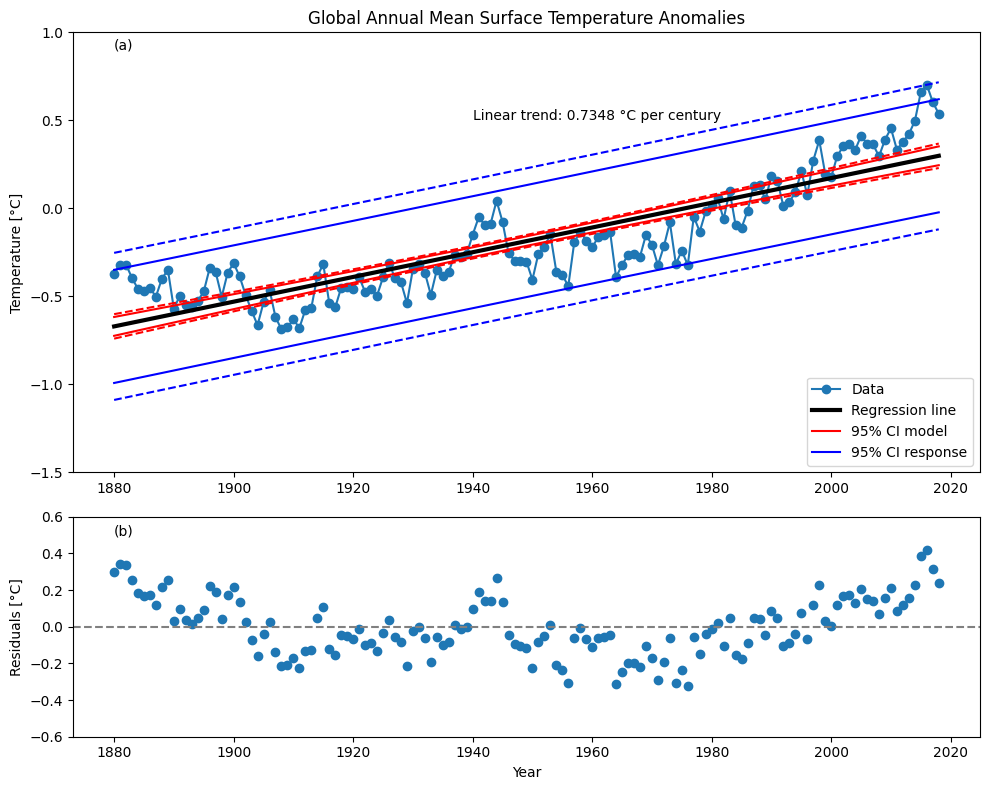

KS test p-value: 0.7787330430200653
Durbin-Watson statistic: 0.4048370785614146
Lag-1 autocorrelation (rho1): 0.9317402443446575
Effective degrees of freedom (EDOF): 4.84101656636265


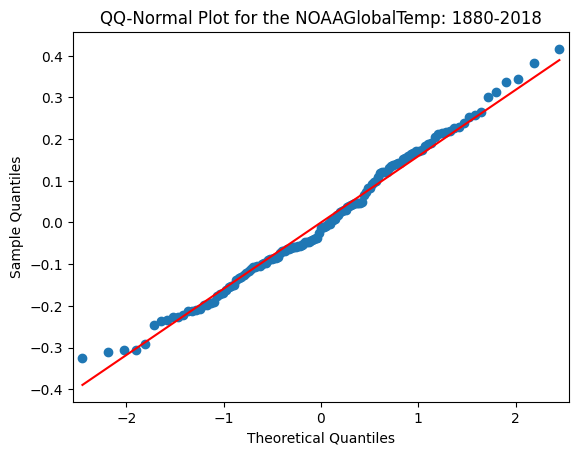

Lag-1 autocorrelation: 0.9317402443446575
Lag-1 correlation: 0.9502564870442989


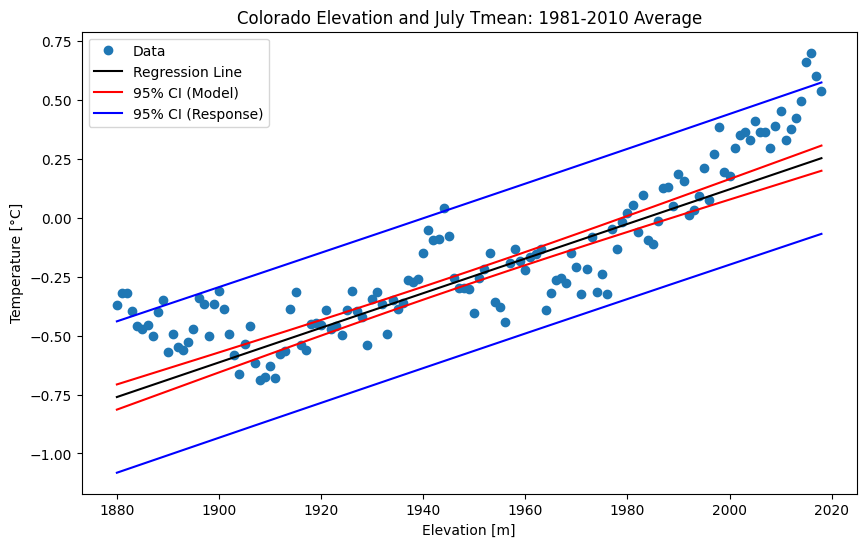

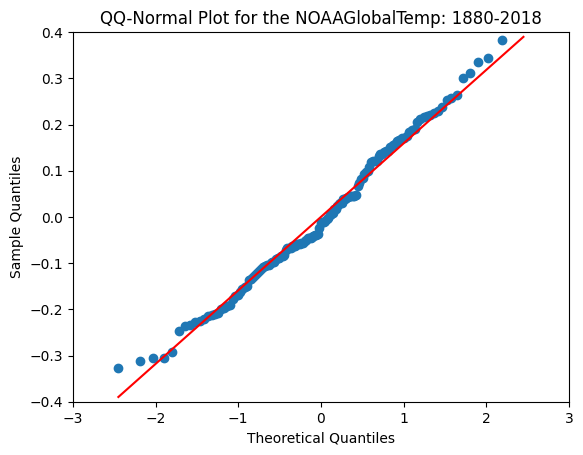

KS test p-value: 0.25018967168860684
Durbin-Watson statistic: 0.4048370785614146
Full ACF lag 1: 0.9317402443446575
Correlation of y with itself: 1.0


In [ ]:
#Fig. 4.6 and make regression diagnostics

df = pd.read_csv("/content/drive/MyDrive/LinAlg/data/aravg.ann.land_ocean.90S.90N.v4.0.1.201907.txt",
                 delim_whitespace=True, header=None)
x = df.iloc[:139, 0].values
y = df.iloc[:139, 1].values

#Fit linear model
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

#Residuals and standard error
residuals = model.resid
SSE = np.sum(residuals**2)
s_squared = SSE / (len(y) - 2)
s = np.sqrt(s_squared)

#Model predictions and confidence intervals
modT = model.params[0] + model.params[1] * x
xbar = np.mean(x)
Sxx = np.sum((x - xbar) ** 2)
n = len(y)
tval_full = t.ppf(0.975, df=n-2)
tval_reduced = t.ppf(0.975, df=5)

CI_model = tval_full * s * np.sqrt((1/n) + (x - xbar)**2 / Sxx)
CI_response = tval_full * s * np.sqrt(1 + (1/n) + (x - xbar)**2 / Sxx)

CI_model_r = tval_reduced * s * np.sqrt((1/n) + (x - xbar)**2 / Sxx)
CI_response_r = tval_reduced * s * np.sqrt(1 + (1/n) + (x - xbar)**2 / Sxx)

#Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})
axs[0].plot(x, y, 'o-', label='Data')
axs[0].plot(x, modT, 'k-', label='Regression line', linewidth=3)
axs[0].plot(x, modT + CI_model, 'r-', label='95% CI model')
axs[0].plot(x, modT - CI_model, 'r-')
axs[0].plot(x, modT + CI_response, 'b-', label='95% CI response')
axs[0].plot(x, modT - CI_response, 'b-')
axs[0].plot(x, modT + CI_model_r, 'r--')
axs[0].plot(x, modT - CI_model_r, 'r--')
axs[0].plot(x, modT + CI_response_r, 'b--')
axs[0].plot(x, modT - CI_response_r, 'b--')
axs[0].set_ylim([-1.5, 1])
axs[0].set_ylabel("Temperature [°C]")
axs[0].set_title("Global Annual Mean Surface Temperature Anomalies")
axs[0].legend()
axs[0].text(1940, 0.5, "Linear trend: 0.7348 °C per century")
axs[0].text(1880, 0.9, "(a)")

axs[1].plot(x, residuals, marker='o', linestyle='none')
axs[1].axhline(0, color='gray', linestyle='--')
axs[1].set_ylim([-0.6, 0.6])
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Residuals [°C]")
axs[1].text(1880, 0.5, "(b)")

plt.tight_layout()
plt.show()

#KS Test for normality
resi_std = np.std(residuals)
resi_mean = np.mean(residuals)
norm_sample = np.random.normal(loc=resi_mean, scale=resi_std, size=len(residuals))
ks_stat, ks_pvalue = ks_2samp(residuals, norm_sample)
print("KS test p-value:", ks_pvalue) #The normality assumption is accepted

#Durbin-Watson Test to check independence
dw_stat = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat) #The independence assumption is rejected

#Autocorrelation
acf_vals = acf(y, nlags=1)
rho1 = acf_vals[1]
print("Lag-1 autocorrelation (rho1):", rho1)

#Effective degrees of freedom
edof = (n - 2) * (1 - rho1) / (1 + rho1)
print("Effective degrees of freedom (EDOF):", edof)

#Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title("QQ-Normal Plot for the NOAAGlobalTemp: 1880-2018")
plt.show()

#Assume x and y are already defined from previous steps
x1 = x
y1 = y
n = len(y1)

#Autocorrelation
acf_vals = acf(y1, nlags=1)
print("Lag-1 autocorrelation:", acf_vals[1])

#Lag-1 correlation manually
lag1_corr = np.corrcoef(y1[:-1], y1[1:])[0, 1]
print("Lag-1 correlation:", lag1_corr)

#Linear regression
X1 = sm.add_constant(x1)
reg8018 = sm.OLS(y1, X1).fit()
residuals = reg8018.resid

#Confidence intervals
SSE = np.sum(residuals ** 2)
s_squared = SSE / (n - 2)
s = np.sqrt(s_squared)
modT = -14.574841 + 0.007348 * x1
xbar = np.mean(x1)
Sxx = np.sum((x1 - xbar) ** 2)

tval = t.ppf(0.975, df=n-2)
CI_model = tval * s * np.sqrt((1/n) + (x1 - xbar)**2 / Sxx)
CI_response = tval * s * np.sqrt(1 + (1/n) + (x1 - xbar)**2 / Sxx)

#Plotting the regression and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, 'o', label='Data')
plt.plot(x1, modT, 'k-', label='Regression Line')
plt.plot(x1, modT + CI_model, 'r-', label='95% CI (Model)')
plt.plot(x1, modT - CI_model, 'r-')
plt.plot(x1, modT + CI_response, 'b-', label='95% CI (Response)')
plt.plot(x1, modT - CI_response, 'b-')
plt.xlabel("Elevation [m]")
plt.ylabel("Temperature [°C]")
plt.title("Colorado Elevation and July Tmean: 1981-2010 Average")
plt.legend()
plt.show()

#Q-Q plot
sm.qqplot(residuals, line='s')
plt.title("QQ-Normal Plot for the NOAAGlobalTemp: 1880-2018")
plt.ylim([-0.4, 0.4])
plt.xlim([-3, 3])
plt.show()

#KS test for normality
resi_mean = np.mean(residuals)
resi_sd = np.std(residuals)
norm_sample = np.random.normal(loc=resi_mean, scale=resi_sd, size=n)
ks_stat, ks_pvalue = ks_2samp(residuals, norm_sample)
print("KS test p-value:", ks_pvalue) #Conclusion: Normal distribution is not rejected.

#Durbin-Watson test
dw_stat = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat) #Conclusion: There is a significant serial correlation.

#Additional autocorrelation
acf_full = acf(y1)
print("Full ACF lag 1:", acf_full[1])

#Correlation with self (should be 1)
print("Correlation of y with itself:", np.corrcoef(y1, y1)[0, 1])
